Please read this blog, [How Has the Covid-19 Pandemic Affected Singapore: the Cost of Living and More](https://medium.com/@luzhenna/how-has-the-covid-19-pandemic-affected-singapore-the-cost-of-living-and-more-2e8888bc53f9), together with this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# format figure styles
plt.style.use('fivethirtyeight')

In [4]:
# update accordingly
PATH2DATA_CPI = '/data/ConsumerPriceIndexCPI2019AsBaseYearAnnual.csv'
PATH2DATA_HOUSEHOLD = '/data/ResidentHouseholdsByTenancyAnnual.csv'
PATH2DATA_HDB_RESALE = '/data/HDBResalePriceIndex1Q2009100Quarterly.csv'
PATH2DATA_INCOME = '/data/AssessableIncomeofIndividualsbyTaxGroup.csv'
PATH2DATA_TAX = '/data/TaxableIndividualsbyChargeableIncomeGroup.csv'
PATH2DATE_UNEMPLOYMENT = '/data/OverallUnemploymentRateAnnual.csv'
PATH2DATA_SERVICE = '/data/DetailsOfOperatingExpenditureForAllServicesIndustriesAnnual copy.csv'
PATH2DATA_POPULATION = '/data/M810001.csv'

###1. Consumer Price Index (CPI)

Raw dataset for Consumer Price Index.

Source: SINGSTAT (Singapore Department of Statistics)

In [11]:
# load raw data
df_CPI = pd.read_csv(PATH2DATA_CPI)
df_CPI.head()

,DataSeries,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1970,1969,1968,1967,1966,1965,1964,1963,1962,1961
0,All Items,113.595,108.370,102.119,99.818,100.0,99.438,99.004,98.436,98.963,...,27.079,26.989,27.058,26.874,26.028,25.513,25.448,25.033,24.513,24.401
1,Food,115.122,108.813,103.326,101.862,100.0,98.498,97.104,95.759,93.833,...,24.129,24.25,24.725,24.68,23.565,22.926,23.034,22.468,21.674,21.522
2,Food Excl Food Serving Services,115.750,110.088,104.546,102.898,100.0,98.87,97.608,96.366,94.198,...,na,na,na,na,na,na,na,na,na,na
3,Bread & Cereals,113.923,106.683,102.592,101.930,100.0,98.501,97.127,96.535,95.333,...,na,na,na,na,na,na,na,na,na,na
4,Rice,101.378,98.426,99.802,101.754,100.0,96.202,94.898,95.374,94.643,...,na,na,na,na,na,na,na,na,na,na


Inflation Rate = ((CPI of current year) – (CPI of previous year)) / (CPI of previous year) * 100

In [12]:
# clean data
df_CPI_clean = df_CPI.copy()

# only keep the CPI for all items
df_CPI_clean = df_CPI[df_CPI['DataSeries'] == 'All Items']

# switch row and column
df_CPI_clean = df_CPI_clean.transpose()

# reset index
df_CPI_clean = df_CPI_clean.reset_index()

# drop first row and rename columns
df_CPI_clean = df_CPI_clean.drop(0)
df_CPI_clean.columns = ['Year', 'CPI']

# correct column types
df_CPI_clean['Year'] = df_CPI_clean['Year'].astype(int)
df_CPI_clean['CPI'] = df_CPI_clean['CPI'].astype(float)

# restrict year range and sort by ascending year
df_CPI_clean = df_CPI_clean[(df_CPI_clean['Year'] >= 2004) & (df_CPI_clean['Year'] <= 2023)].sort_values(by='Year', ascending=True)

# add a column and calculate year-on-year growth
df_CPI_clean['inflation_rate'] = df_CPI_clean['CPI'].astype(float).pct_change()

df_CPI_clean.head()

,Year,CPI,inflation_rate
20,2004,76.518,NaN
19,2005,76.877,0.004692
18,2006,77.617,0.009626
17,2007,79.251,0.021052
16,2008,84.504,0.066283


Text(0.5, 1.08, 'Singapore Consumer Price Index (CPI) by Year')

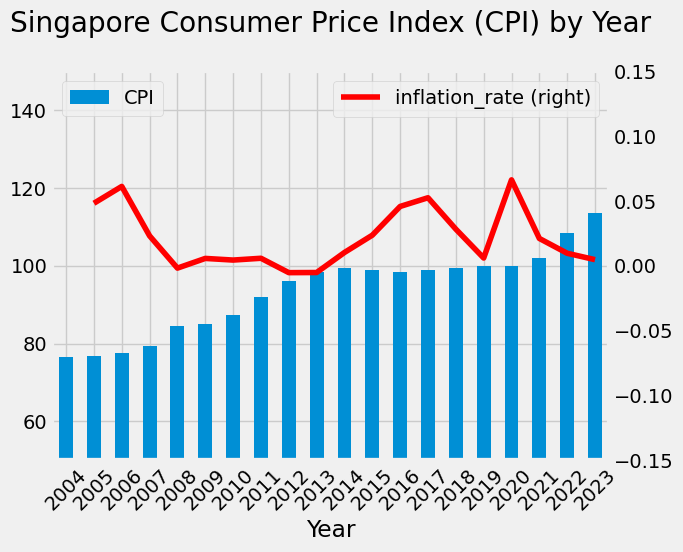

In [17]:
# plot CPI by year on the left axis and YoY_growth by year on the right axis
ax1 = df_CPI_clean.plot(kind='bar', x='Year', y='CPI')
ax2 = df_CPI_clean['inflation_rate'].plot(secondary_y=True, color='red')

# rotate x label by 45 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# set y range
ax1.set_ylim(50, 150)
ax2.set_ylim(-0.15, 0.15)

# add a legend for ax1
ax1.legend(loc='upper left')

# add a legend for ax2
ax2.legend(loc='upper right')

# add a title and shift title up
plt.title('Singapore Consumer Price Index (CPI) by Year', y=1.08)

###2. Income of Individual

Source: IRAS (Inland Revenue Authority of Singapore)

In [19]:
# load raw data
df_income = pd.read_csv(PATH2DATA_INCOME)
df_income.head()

,year_of_assessment,tax_group,no_of_indv_assessed,total_income,donations,assessable_income
0,2004,Non-Taxable Group,1019375,18385892,90979,18294913
1,2004,Taxable Group,714843,53493055,163238,53329817
2,2005,Non-Taxable Group,797513,15578286,76568,15501718
3,2005,Taxable Group,731348,56015862,170457,55845405
4,2006,Non-Taxable Group,691441,14288278,143223,14145055


In [20]:
# create a new df
df_income_clean = df_income.copy()

# aggregate by year and across tax_group
df_income_clean = df_income_clean.groupby(['year_of_assessment']).agg(
    {'total_income': 'sum', 'no_of_indv_assessed': 'sum'}
    ).reset_index()

# create a new column and caculate total_income per individual
df_income_clean['avg_income'] = df_income_clean['total_income'] / df_income_clean['no_of_indv_assessed']

# rename columns
df_income_clean.columns = ['year', 'total_income', 'no_of_indv', 'avg_income']

df_income_clean.head()

,year,total_income,no_of_indv,avg_income
0,2004,71878947,1734218,41.447469
1,2005,71594148,1528861,46.828422
2,2006,75480304,1461040,51.662038
3,2007,84724808,1522175,55.660360
4,2008,98848536,1616707,61.141899


Text(0.5, 1.08, 'Average Income in Singapore by Year')

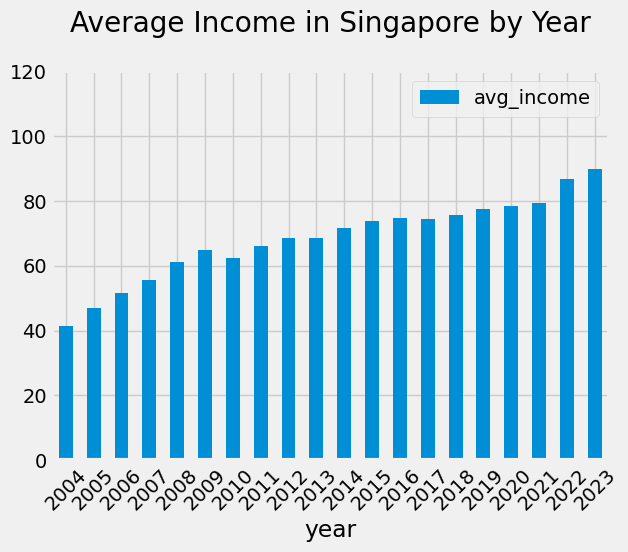

In [23]:
# plot a bar chart
df_income_clean.plot(kind='bar', x='year', y=['avg_income'])

# rotate x label by 45 degrees
plt.xticks(rotation=45)

# adjust the ylim
plt.ylim(0, 120)

# add a title
plt.title('Average Income in Singapore by Year', y=1.08)

### 2.1 CPI vs. Income

In [25]:
# merge df_CPI_clean and df_income_clean
df_CPI_income = pd.merge(df_CPI_clean, df_income_clean, left_on='Year', right_on='year')

# create a new column and calculate the year-on-year growth of average income
df_CPI_income['YoY_Growth_Income'] = df_CPI_income['avg_income'].pct_change()

df_CPI_income.head()

,Year,CPI,inflation_rate,year,total_income,no_of_indv,avg_income,YoY_Growth_Income
0,2004,76.518,NaN,2004,71878947,1734218,41.447469,NaN
1,2005,76.877,0.004692,2005,71594148,1528861,46.828422,0.129826
2,2006,77.617,0.009626,2006,75480304,1461040,51.662038,0.103220
3,2007,79.251,0.021052,2007,84724808,1522175,55.660360,0.077394
4,2008,84.504,0.066283,2008,98848536,1616707,61.141899,0.098482


Text(0.5, 1.08, 'Inflation Rate vs. Income Growth in Singapore')

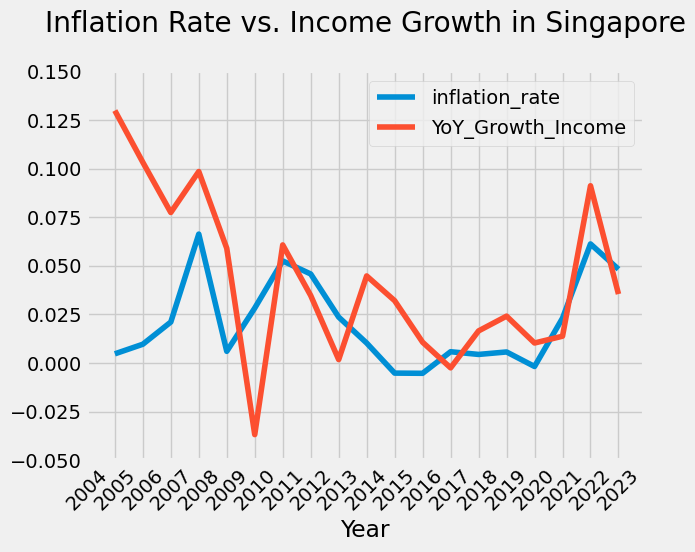

In [38]:
# plot the inflation_rate by year and YoY_Growth_Income by year
df_CPI_income.plot(kind='line', x='Year', y=['inflation_rate', 'YoY_Growth_Income'])

# use Year column for x ticks
plt.xticks(df_CPI_income['Year'])

# rotate x label by 45 degrees
plt.xticks(rotation=45)

# adjust ylim
plt.ylim(-0.05, 0.15)

# add a title
plt.title('Inflation Rate vs. Income Growth in Singapore', y=1.08)

###3. Unemployment Rate

Source: MOM (Ministry of Manpower)

In [41]:
# load raw data
df_unemployment = pd.read_csv(PATH2DATE_UNEMPLOYMENT)
df_unemployment.head()

,year,residential_status,unemployment_rate
0,1992,overall,1.8
1,1993,overall,1.7
2,1994,overall,1.7
3,1995,overall,1.8
4,1996,overall,1.7


In [42]:
df_unemployment_clean = df_unemployment.copy()

# keep years from 2004 to 2023
df_unemployment_clean = df_unemployment_clean[(df_unemployment_clean['year'] >= 2004) & (df_unemployment_clean['year'] <= 2023)]

df_unemployment_clean.head()

,year,residential_status,unemployment_rate
12,2004,overall,3.4
13,2005,overall,3.1
14,2006,overall,2.7
15,2007,overall,2.1
16,2008,overall,2.2


Text(0.5, 1.08, 'Unemployment Rate in Singapore by Year')

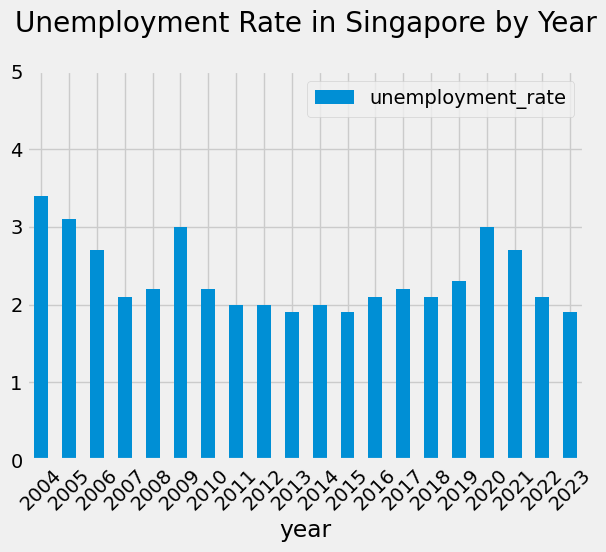

In [45]:
# plot bar graph
df_unemployment_clean.plot(kind='bar', x='year', y='unemployment_rate')

# adjust y lim
plt.ylim(0, 5)

# rotate x labels by 45 degrees
plt.xticks(rotation=45)

# add a title
plt.title('Unemployment Rate in Singapore by Year', y=1.08)

###4. Population in Singapore

Source: SINGSTAT (Singapore Department of Statistics)

In [62]:
# load raw data
df_population = pd.read_csv(PATH2DATA_POPULATION)
df_population.head()

,Data Series,2024,2023,2022,2021,2020,2019,2018,2017,2016,...,1959,1958,1957,1956,1955,1954,1953,1952,1951,1950
0,Total Population (Number),6036860,5917648,5637022.0,5453566.0,5685807.0,5703569.0,5638676.0,5612253.0,5607283.0,...,1587200,1518800,1445929,1371600,1305500,1248200,1191800,1127000,1068100,1022100
1,Resident Population (Number),4180868,4149253,4073239.0,3986842.0,4044210.0,4026209.0,3994283.0,3965796.0,3933559.0,...,na,na,na,na,na,na,na,na,na,na
2,Singapore Citizen Population (Number),3635937,3610658,3553749.0,3498191.0,3523191.0,3500940.0,3471936.0,3439177.0,3408943.0,...,na,na,na,na,na,na,na,na,na,na
3,Permanent Resident Population (Number),544931,538595,519490.0,488651.0,521019.0,525269.0,522347.0,526619.0,524616.0,...,na,na,na,na,na,na,na,na,na,na
4,Non-Resident Population (Number),1855992,1768395,1563783.0,1466724.0,1641597.0,1677360.0,1644393.0,1646457.0,1673724.0,...,na,na,na,na,na,na,na,na,na,na


In [63]:
df_population_clean = df_population.copy()

# transpose df and reset index
df_population_clean = df_population_clean.transpose().reset_index()

# make the first row the header and subsequently drop the first row
df_population_clean.columns = df_population_clean.iloc[0]
df_population_clean = df_population_clean.drop(0)

# rename 'Data Series' to 'year' and change dtype to int
df_population_clean = df_population_clean.rename(columns={'Data Series': 'year'})

# change year column to integer type
df_population_clean['year'] = df_population_clean['year'].astype(int)

# keep from 2004 to 2023
df_population_clean = df_population_clean[(df_population_clean['year'] >= 2004) & (df_population_clean['year'] <= 2023)]

# sort by year in ascending order
df_population_clean = df_population_clean.sort_values(by='year', ascending=True)

df_population_clean.head()

,year,Total Population (Number),Resident Population (Number),Singapore Citizen Population (Number),Permanent Resident Population (Number),Non-Resident Population (Number),Total Population Growth (Per Cent)
21,2004,4166664.0,3413266.0,3057087.0,356179.0,753398.0,1.3
20,2005,4265762.0,3467814.0,3081001.0,386813.0,797948.0,2.4
19,2006,4401365.0,3525894.0,3107924.0,417970.0,875471.0,3.2
18,2007,4588599.0,3583082.0,3133848.0,449234.0,1005517.0,4.3
17,2008,4839396.0,3642659.0,3164438.0,478221.0,1196737.0,5.5


Text(0.5, 1.08, 'Population (Structure) in Singapore by Year')

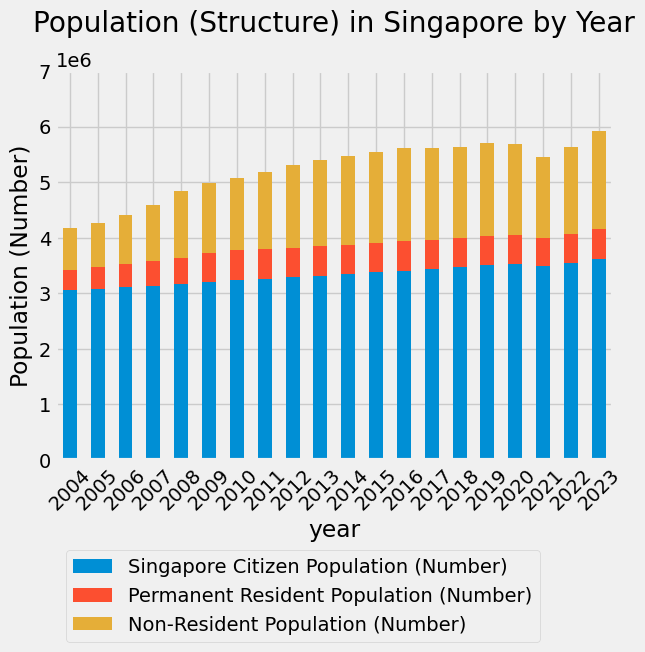

In [67]:
# plot a stacked bar chart by year
df_population_clean.plot(
    kind='bar', x='year', y=['Singapore Citizen Population (Number)', 'Permanent Resident Population (Number)', 'Non-Resident Population (Number)'],
    stacked=True
    )

# move the legend outside at the bottom
plt.legend(bbox_to_anchor=(0, -0.35), loc='center left')

# adjust y lim
plt.ylim(0, 7*1e6)

# add y label
plt.ylabel('Population (Number)')

# rotate x label by 45 degress
plt.xticks(rotation=45)

# add a title
plt.title('Population (Structure) in Singapore by Year', y=1.08)

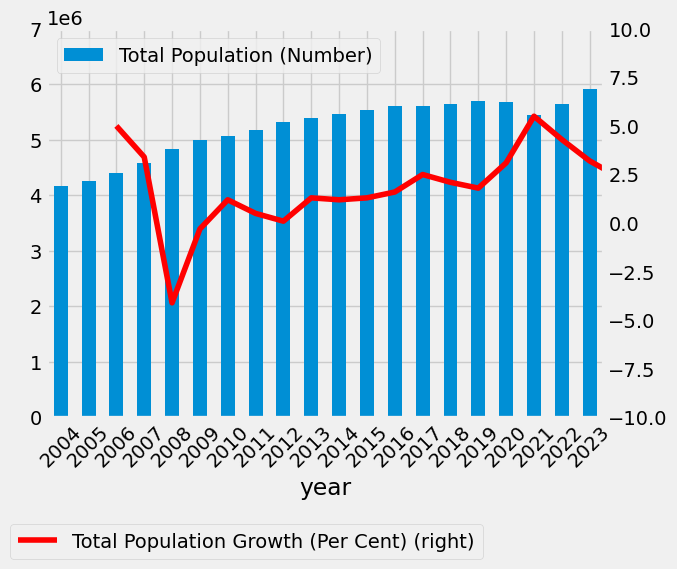

In [80]:
# plot total population on the left axis and growth on the right axis
ax1 = df_population_clean.plot(kind='bar', x='year', y='Total Population (Number)')
ax2 = df_population_clean['Total Population Growth (Per Cent)'].plot(secondary_y=True, color='red')

# rotate x label by 45 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# change ylim
ax1.set_ylim(0, 7*1e6)
ax2.set_ylim(-10, 10)

# add a legend for ax1 outside the chart
ax1.legend(loc='upper left')

# add a legend for ax2
ax2.legend(bbox_to_anchor=(0.8, -0.25))

###5. Income Group

Source: IRAS (Inland Revenue Authority of Singapore)

In [54]:
# load raw data
df_tax = pd.read_csv(PATH2DATA_TAX)
df_tax.head()

,year_of_assessment,chargeable_income_group,resident_type,number_of_taxpayers,assessable_income,chargeable_income,net_tax_assessed
0,2011,"20,000 & below",Tax Resident,0,0,0,0
1,2011,"20,001 - 25,000",Tax Resident,216179,6812418,4858458,14975
2,2011,"25,001 - 30,000",Tax Resident,171214,6410750,4691532,35467
3,2011,"30,001 - 40,000",Tax Resident,223428,10463602,7714587,106946
4,2011,"40,001 - 50,000",Tax Resident,129280,7747023,5767798,133087


In [55]:
df_tax_clean = df_tax.copy()

# drop data before 2016
df_tax_clean = df_tax_clean[df_tax_clean['year_of_assessment'] >= 2016]

# create a new column and label if it's earlier than 2020
df_tax_clean['earlier_than_2020'] = df_tax_clean['year_of_assessment'] < 2020

# aggregate by time group and chargeable_income_group
df_tax_clean = df_tax_clean.groupby(['earlier_than_2020', 'chargeable_income_group']).agg(
    {'assessable_income': 'sum', 'number_of_taxpayers': 'sum'}
    ).reset_index()

# create a new column for income_per_capita
df_tax_clean['income_per_capita'] = df_tax_clean['assessable_income'] / df_tax_clean['number_of_taxpayers']

# sort by income_per_capita in ascending order
df_tax_clean = df_tax_clean.sort_values(by='income_per_capita', ascending=True)

df_tax_clean.head()

,earlier_than_2020,chargeable_income_group,assessable_income,number_of_taxpayers,income_per_capita
19,True,"20,000 & below",761082,99802,7.625919
3,False,"20,000 & below",686574,83135,8.258543
4,False,"20,001 - 25,000",28228559,930448,30.338674
20,True,"20,001 - 25,000",30375997,999964,30.377091
22,True,"25,001 - 30,000",34127029,956195,35.690449


In [56]:
# create two new df, one for earlier than 2020, another for later than 2020
df_income_before = df_tax_clean[df_tax_clean['earlier_than_2020']==True]
df_income_after = df_tax_clean[df_tax_clean['earlier_than_2020']==False]

# create a new column and calculate the percentage of taxpayers
df_income_before['percentage_of_taxpayers'] = df_income_before['number_of_taxpayers'] / df_income_before['number_of_taxpayers'].sum()
df_income_after['percentage_of_taxpayers'] = df_income_after['number_of_taxpayers'] / df_income_after['number_of_taxpayers'].sum()

In [57]:
df_income_before.head()

,earlier_than_2020,chargeable_income_group,assessable_income,number_of_taxpayers,income_per_capita,percentage_of_taxpayers
19,True,"20,000 & below",761082,99802,7.625919,0.013544
20,True,"20,001 - 25,000",30375997,999964,30.377091,0.135703
22,True,"25,001 - 30,000",34127029,956195,35.690449,0.129763
23,True,"30,001 - 40,000",63767001,1430863,44.565413,0.194180
25,True,"40,001 - 50,000",50922027,875977,58.131694,0.118877


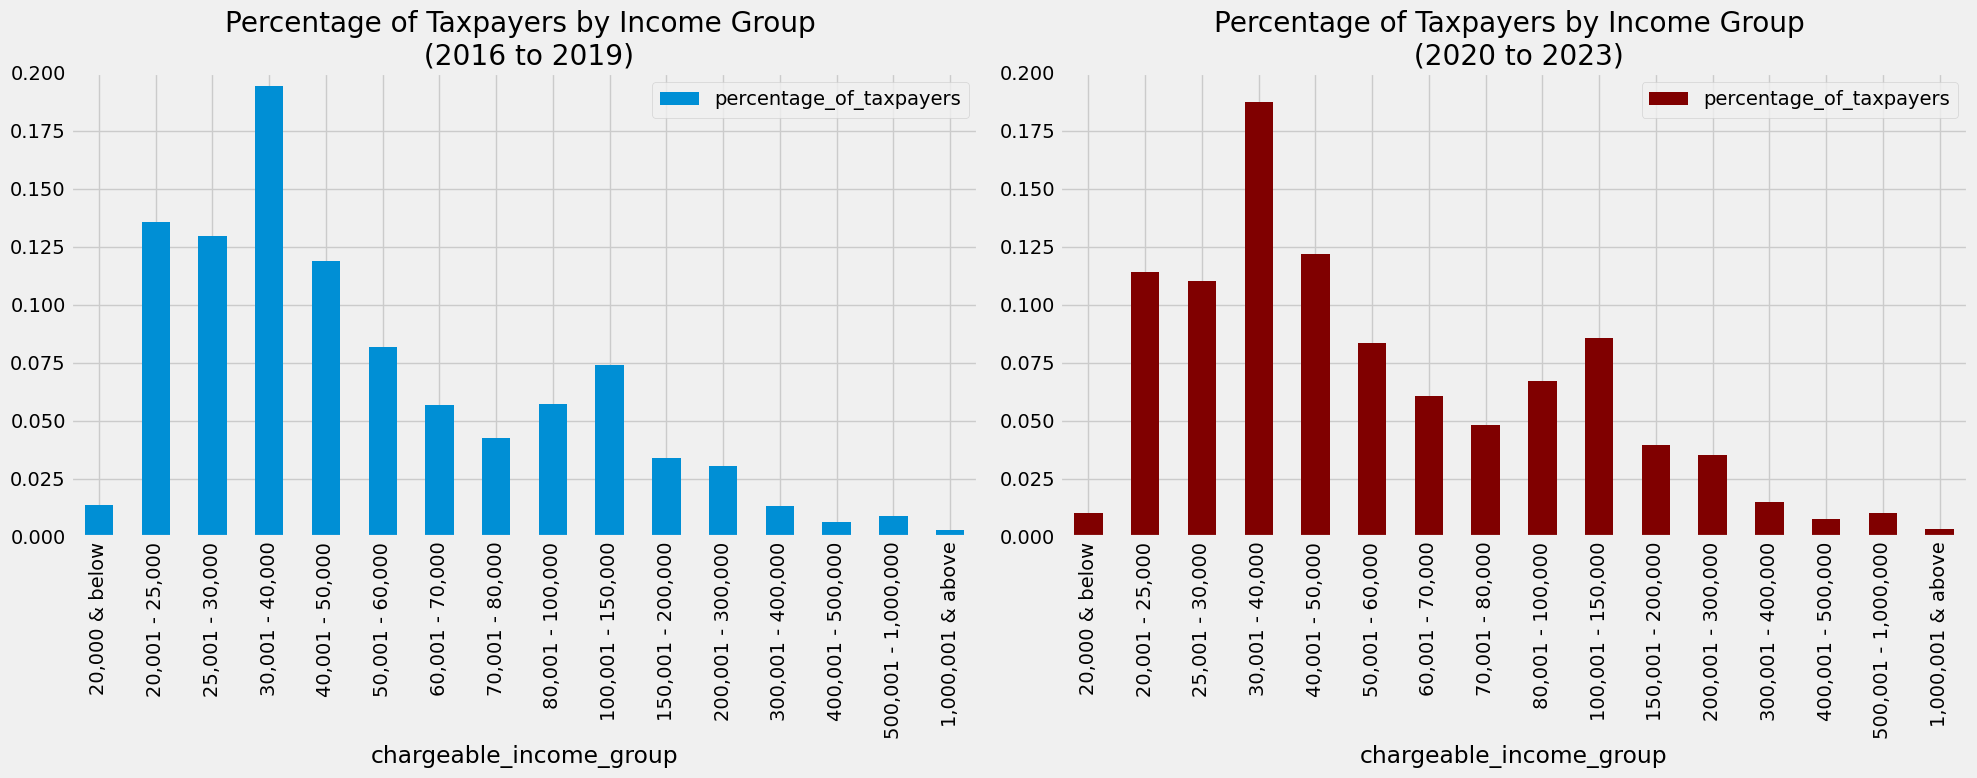

In [82]:
# create 1*2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax1 = df_income_before.plot(
    kind='bar', x='chargeable_income_group', y='percentage_of_taxpayers', ax=ax1)
ax2 = df_income_after.plot(
    kind='bar', x='chargeable_income_group', y='percentage_of_taxpayers', ax=ax2, color='maroon')

# reset ylim
ax1.set_ylim(0, 0.2)
ax2.set_ylim(0, 0.2)

# add titles
ax1.set_title('Percentage of Taxpayers by Income Group \n (2016 to 2019)')
ax2.set_title('Percentage of Taxpayers by Income Group \n (2020 to 2023)')

fig.tight_layout()

###6. Service Sector Operating Cost

Source: SINGSTAT (Singapore Department of Statistics)

In [85]:
# load raw data
df_service = pd.read_csv(PATH2DATA_SERVICE)
df_service.head()

,DataSeries,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,"Total Services Sector, Operating Expenditure",5213921.0,4341961.3,3253400.1,3566321.1,3558586.8,3059514.2,2545229.7,2645278.3,2827474.2,2719312.1,2445329.4,2245125.0,1753664.5
1,"Wholesale Trade - SSIC 46, Operating Expenditure",4513252.2,3725965.5,2773830.3,3076456.8,3100572.8,2639579.7,2153494.0,2270029.1,2471903.7,2380320.1,2130258.0,1956834.0,1489467.6
2,"Retail Trade - SSIC 47, Operating Expenditure",49501.1,45249.3,40169.5,46209.6,46548.1,46552.7,45747.3,44422.7,42753.7,41725.8,40913.9,38558.8,35530.5
3,"Transportation & Storage - SSIC 49-53, Operati...",254863.2,224188.3,151900.1,158291.2,146755.6,116430.4,103976.9,106802.1,103419.4,99263.8,92017.9,86553.5,79903.8
4,"Accommodations Services - SSIC 55, Operating E...",5366.3,4032.7,4307.0,5918.1,5604.3,5326.3,5064.0,4997.8,4768.5,4500.0,4177.7,3832.3,3284.8


In [86]:
df_service_clean = df_service.copy()

# transpose df
df_service_clean = df_service_clean.transpose().reset_index()

# replace header with first row
df_service_clean.columns = df_service_clean.iloc[0]

# drop first row
df_service_clean = df_service_clean.drop(0)

# rename DataSeries to year
df_service_clean = df_service_clean.rename(columns={'DataSeries': 'year'})

# sort by year in ascending order
df_service_clean = df_service_clean.sort_values(by='year', ascending=True)

df_service_clean.head()

,year,"Total Services Sector, Operating Expenditure","Wholesale Trade - SSIC 46, Operating Expenditure","Retail Trade - SSIC 47, Operating Expenditure","Transportation & Storage - SSIC 49-53, Operating Expenditure","Accommodations Services - SSIC 55, Operating Expenditure","Food & Beverage Services - SSIC 56, Operating Expenditure","Information & Communications - SSIC 58-63, Operating Expenditure","Real Estate, Professional And Administrative & Support Services SSIC 68-82, Operating Expenditure","Recreation, Community & Personal Services - SSIC 85-96, Operating Expenditure","Health Services - SSIC 86, Operating Expenditure","All Services Sector, Operating Expenditure"
13,2010,1753664.5,1489467.6,35530.5,79903.8,3284.8,6909.7,33218.7,77654.8,27694.7,8353.1,3515682.2
12,2011,2245125.0,1956834.0,38558.8,86553.5,3832.3,8094.2,36197.2,84572.1,30483.0,9163.4,4499413.5
11,2012,2445329.4,2130258.0,40913.9,92017.9,4177.7,8920.0,40544.6,95298.2,33199.0,10257.8,4900916.5
10,2013,2719312.1,2380320.1,41725.8,99263.8,4500.0,9711.5,43701.9,104181.2,35907.8,11521.5,5450145.7
9,2014,2827474.2,2471903.7,42753.7,103419.4,4768.5,10186.4,49387.9,106589.3,38465.3,12848.5,5667796.9


Text(0.5, 1.08, 'Service Sector Operating Cost in Singapore')

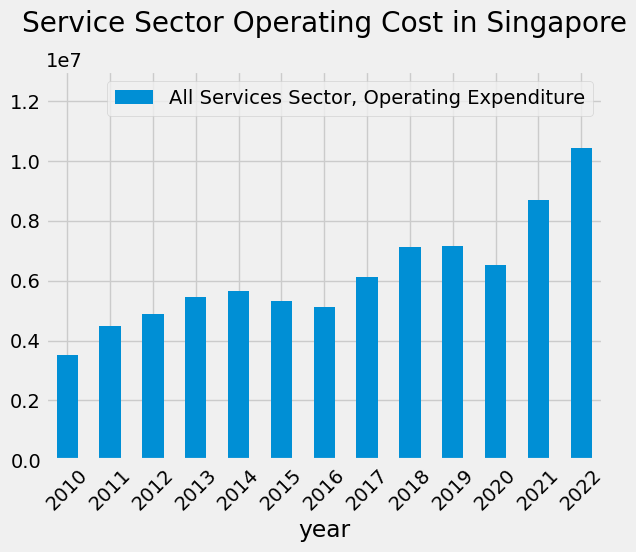

In [95]:
# plot a bar graph
df_service_clean.plot(
    kind='bar', x='year', y='All Services Sector, Operating Expenditure'
    )

# rotate x labels by 45 degrees
plt.xticks(rotation=45)

# adjust y lim
plt.ylim(0, 1.3*1e7)

# add a title
plt.title('Service Sector Operating Cost in Singapore', y=1.08)

In [88]:
COL_LIST = [
        # 'Total Services Sector, Operating Expenditure',
       'Wholesale Trade - SSIC 46, Operating Expenditure',
       'Retail Trade - SSIC 47, Operating Expenditure',
       'Transportation & Storage - SSIC 49-53, Operating Expenditure',
       'Accommodations Services - SSIC 55, Operating Expenditure',
       'Food & Beverage Services - SSIC 56, Operating Expenditure',
       'Information & Communications - SSIC 58-63, Operating Expenditure',
       'Real Estate, Professional And Administrative & Support Services SSIC 68-82, Operating Expenditure',
       'Recreation, Community & Personal Services - SSIC 85-96, Operating Expenditure',
        ]

for col in COL_LIST:
  # normalize values column by column
  df_service_clean[col] = (df_service_clean[col] - df_service_clean[col].min()) / (df_service_clean[col].max() - df_service_clean[col].min())

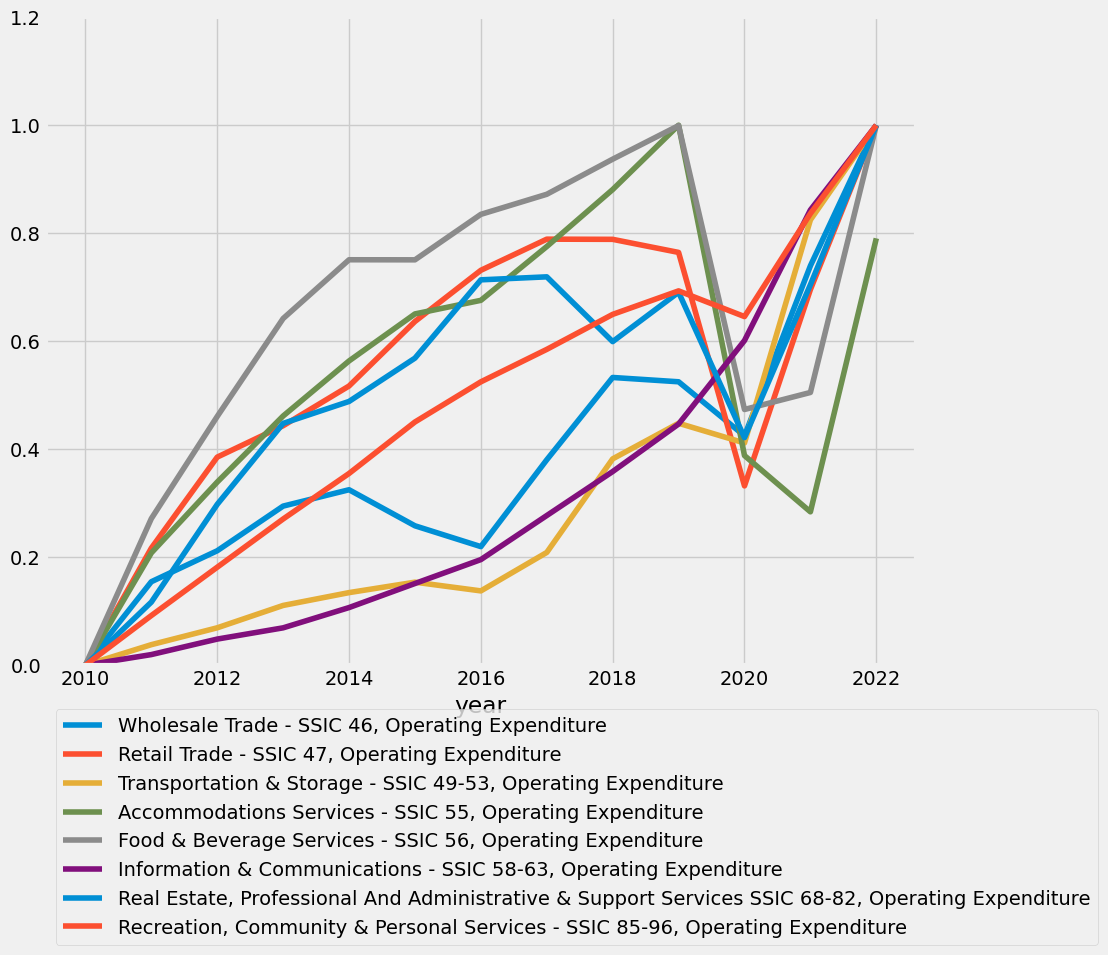

In [89]:
fig = df_service_clean.plot(
    kind='line', x='year',
    y=COL_LIST,
    figsize=(10,8),
    )

# reset ylim
plt.ylim(0, 1.2)

# locate legend outside
plt.legend(bbox_to_anchor=(0, -0.25), loc='center left')

###Resident Households By Tenancy

Source: SINGSTAT (Singapore Department of Statistics)


In [65]:
# load raw data
df_household = pd.read_csv(PATH2DATA_HOUSEHOLD)
df_household.head()

,DataSeries,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2006,2005,2004,2003,2002,2001,2000,1995,1990,1980
0,Resident Households,1425100.0,1399600.0,1390600.0,1372600.0,1372400.0,1325300.0,1289900.0,1263600.0,1225300.0,...,1054100.0,1024500.0,1003800.0,989000.0,964600.0,934400.0,915100.0,768400.0,661700.0,472700.0
1,Owner-Occupied,1277800.0,1249700.0,1236900.0,1206000.0,1240600.0,1205800.0,1170200.0,1149100.0,1112400.0,...,952100.0,933700.0,929000.0,912400.0,898100.0,869600.0,841600.0,691700.0,578900.0,278100.0
2,Rented,132000.0,131700.0,134800.0,152100.0,122500.0,112400.0,109800.0,107600.0,106200.0,...,90500.0,80600.0,61800.0,67000.0,58800.0,58100.0,63400.0,71300.0,78600.0,181200.0
3,Proportion Of Owner-Occupied Resident Households,89.7,89.3,88.9,87.9,90.4,91.0,90.7,90.9,90.8,...,90.3,91.1,92.5,92.3,93.1,93.1,92.0,90.0,87.5,58.8
4,Total HDB Dwellings,91.3,90.9,90.9,89.2,91.9,92.2,92.1,92.2,92.0,...,92.2,93.0,94.2,93.4,94.1,94.0,93.1,90.6,89.8,61.5


In [67]:
# select the top 3 rows from the raw df
df_household_clean = df_household.head(3)

# transpose and df and reset index
df_household_clean = df_household_clean.transpose().reset_index()

# remove first row and rename columns
df_household_clean = df_household_clean.drop(0)
df_household_clean.columns = ['Year', 'Total_Households', 'Owned_Households', 'Rented_Households']

# change all column types to integer
df_household_clean = df_household_clean.astype(int)

# keep year from 2004 to 2023 and sort by year
df_household_clean = df_household_clean[(df_household_clean['Year'] >= 2004) & (df_household_clean['Year'] <= 2023)].sort_values(by='Year', ascending=True)

df_household_clean.head()

,Year,Total_Households,Owned_Households,Rented_Households
20,2004,1003800,929000,61800
19,2005,1024500,933700,80600
18,2006,1054100,952100,90500
17,2007,1074800,966900,94500
16,2008,1093100,985000,93300


(800000.0, 1600000.0)

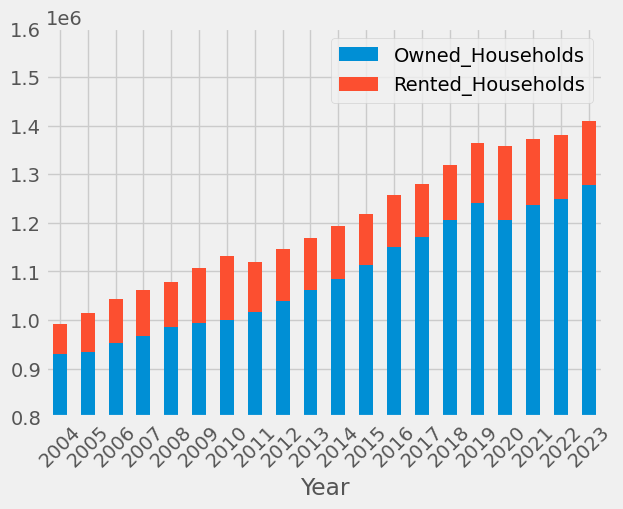

In [68]:
# plot a stacked bar chart
ax = df_household_clean.plot(
    kind='bar', x='Year', y=['Owned_Households', 'Rented_Households'], stacked=True
    )

# rotate x label by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# reset ylim
ax.set_ylim(0.8*1e6, 1600000)

###HDB Resale Price Index

Source: HDB (Housing and Development Board)

In [17]:
# load raw data
df_hdb_resale = pd.read_csv(PATH2DATA_HDB_RESALE)
df_hdb_resale.head()

,quarter,index
0,1990-Q1,24.3
1,1990-Q2,24.4
2,1990-Q3,25.0
3,1990-Q4,24.7
4,1991-Q1,24.9


In [116]:
df_hdb_clean = df_hdb_resale.copy()

# create a year column and parse year from quarter column
df_hdb_clean['year'] = df_hdb_clean['quarter'].str[:4].astype(int)

# drop quarter column and aggregate by year
df_hdb_clean = df_hdb_clean.drop(columns=['quarter']).groupby('year').mean().reset_index()

# filter year between 2004 and 2023
df_hdb_clean = df_hdb_clean[(df_hdb_clean['year'] >= 2004) & (df_hdb_clean['year'] <= 2023)]

# create a new column for year on year growth
df_hdb_clean['YoY_Growth_RPI'] = df_hdb_clean['index'].pct_change()

# rename columns
df_hdb_clean.columns = ['year', 'hdb_RPI', 'YoY_Growth_RPI']

df_hdb_clean.head()

,year,hdb_RPI,YoY_Growth_RPI
14,2004,76.225,NaN
15,2005,74.350,-0.024598
16,2006,74.250,-0.001345
17,2007,81.275,0.094613
18,2008,96.725,0.190095


(50.0, 200.0)

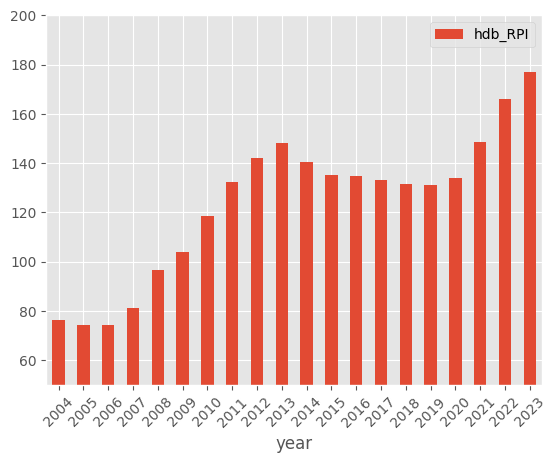

In [175]:
# plot a bar chart
df_hdb_clean.plot(kind='bar', x='year', y='hdb_RPI')

# rotate x label by 45 degrees
plt.xticks(rotation=45)

# set y range
plt.ylim(50, 200)